### Buurten analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import webbrowser
import cbsodata
import ssl
import geopandas as gpd
ssl._create_default_https_context = ssl._create_unverified_context
from pyogrio import read_dataframe

#### Importeer kaart van NL met buurten

In [23]:
# Gemeente: worked last year but they changed the api call: as we dont use this anymore this code is depricated
# geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2022_gegeneraliseerd&outputFormat=json'
# municipal_boundaries = gpd.read_file(geodata_url)

# municipal_boundaries.info(verbose=True)
# municipal_boundaries.head()
# municipal_boundaries['rubriek'].nunique()
# municipal_boundaries['statcode'].nunique()

# municipal_boundaries.plot()

In [3]:
# get local buurt data and import
file_path = '../data/buurt_2020_v3.shp'

buurten_map = read_dataframe(file_path)  #lot quicker than gpd.read_file()

<Axes: >

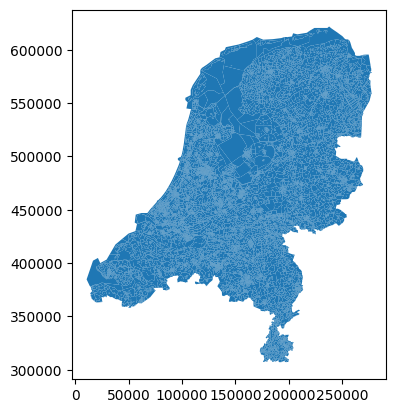

In [4]:
buurten_map.plot()

In [8]:
# lets clean it up a bit so that we only get the relevant part of the netherlands
# gemeente_selectie = ['Houten','Utrecht', 'Zeist']
gemeente_selectie = ['Houten']

gem_map = buurten_map.loc[buurten_map['GM_NAAM'].isin(gemeente_selectie)]

drop_buurten_houten = ['Buitengebied Houten West',
       'Buitengebied Houten Oost', "Dorp 't Goy", "'t Goyse Dorp",
       "Buitengebied 't Goy", "'t Waal", 'Tull',
       "Buitengebied Tull en 't Waal", 'Dorp Schalkwijk West',
       'Dorp Schalkwijk Oost', 'Buitengebied Schalkwijk West',
       'Buitengebied Schalkwijk Oost','Bruggen', 'Bogen', 'De Poel',
       'Schepen', 'Boten', 'Honen', 'Kaden', 'Vesten', 'De Staart',
       'Hof van Wulven', 'Rondweg Noord-Oost', 'Rondweg Noord-West',
       'Rondweg Zuid-Oost', 'Rondweg Zuid-West'] 

drop_buurten_utrecht = [
       'Bedrijventerrein Lageweide',
       'Haarzuilens en omgeving',
       'Bedrijventerrein en omgeving',
       'Utrecht Science Park',
              'Bedrijvengebied Strijkviertel', 
              'Bedrijvengebied Papendorp',
              'Rijnenburg',
              'Poldergebied Overvecht' ,
              ]

gem_map = gem_map.loc[~gem_map['BU_NAAM'].isin(drop_buurten_houten)]
gem_map = gem_map.loc[~gem_map['BU_NAAM'].isin(drop_buurten_utrecht)]

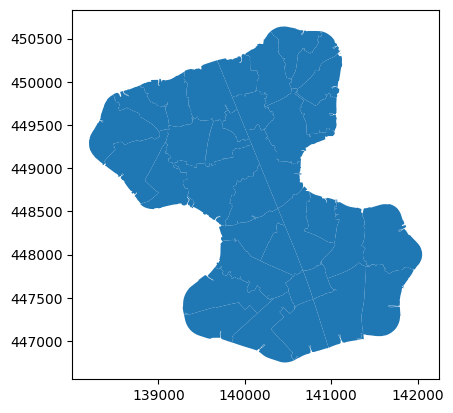

In [10]:
gem_map.plot()
plt.show()

#### Basis features per buurt 

In [40]:
# basic dataset is that from the kerncijfers wijken en buurten from cbs 
totale_dataset = pd.read_excel('../data/kwb-2022.xlsx')  
gemeente = totale_dataset.loc[totale_dataset['gm_naam'].isin(gemeente_selectie)]
buurten = gemeente.loc[gemeente['recs'] == 'Buurt']

In [41]:
gemeente['recs'].value_counts()

Buurt       61
Wijk        11
Gemeente     1
Name: recs, dtype: int64

In [42]:
buurten.head()

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
4482,BU03211010,3211010,Oude Dorp,Houten,Buurt,BU03211010,1,2055,1005,1045,...,.,.,.,43,43,0,3991,1,2,1963
4483,BU03211011,3211011,Oorden,Houten,Buurt,BU03211011,1,965,465,500,...,.,.,.,22,21,1,3991,1,2,2100
4484,BU03211012,3211012,Hoven,Houten,Buurt,BU03211012,1,885,440,445,...,.,.,.,14,14,0,3991,1,2,2416
4485,BU03211013,3211013,Gaarden,Houten,Buurt,BU03211013,1,1320,660,660,...,.,.,.,21,21,0,3992,1,2,1926
4486,BU03211014,3211014,Hoeven,Houten,Buurt,BU03211014,1,1705,850,850,...,.,.,.,29,29,0,3992,2,2,2139


In [20]:
## small analysis to create random score of buurt
# import random
# import numpy as np
# buurten['score'] = np.random.randint(1, 11, buurten.shape[0])

# buurten['score'].value_counts().plot(kind='bar')

# score = buurten[['score', 'gwb_code_10']]

# #  Koppel data 
# score_per_gemeente = pd.merge(gem_map, score,
#                            left_on = "BU_CODE", 
#                            right_on = "gwb_code_10")

# # Maak een thematische kaart
# p = score_per_gemeente.plot(column='score', 
#                          figsize = (8,5),
#                          cmap='RdYlGn',
#                          legend=True,
#                          legend_kwds={'label': "Score van de gebruiker",
#                                 'orientation': "vertical"})
# p.axis('off')

# p.set_title(f'Score per buurt in {gemeente_selectie}')
# plt.show()

In [23]:
# # check all columns
# buurten.columns.to_list()

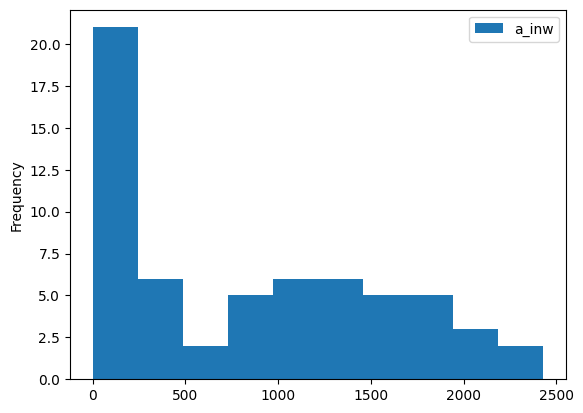

In [24]:
## aantal inwoners
aantal_inwoners = buurten[['gwb_code_10', 'a_inw']]
aantal_inwoners.plot(kind='hist')
plt.show()

In [25]:
def create_plot_var(input_df: pd.DataFrame, map_df: pd.DataFrame, key: str, value: str):
       item = input_df[['gwb_code_10', value]]
       score_per_buurt =  pd.merge(map_df, item,
                     left_on = "BU_CODE", 
                     right_on = "gwb_code_10")

       # Maak een thematische kaart
       p = score_per_buurt.plot(column=value, 
                            figsize = (6,4),
                            cmap='RdYlGn',
                            # legend=True,
                            # legend_kwds={'label': "Score van de gebruiker",
                            #        'orientation': "vertical"}
                            )
       p.axis('off')
       p.set_title(f'Score per buurt in {gemeente_selectie} voor de volgende variabele: {key}')
       plt.show()

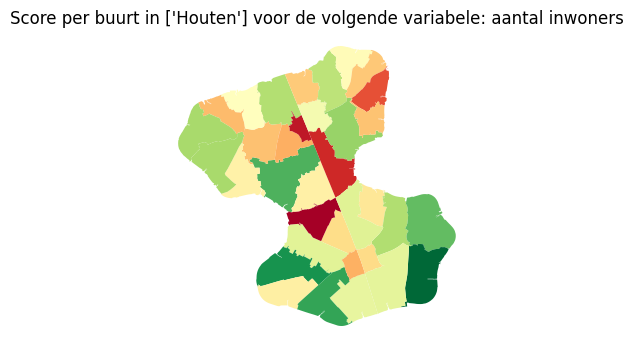

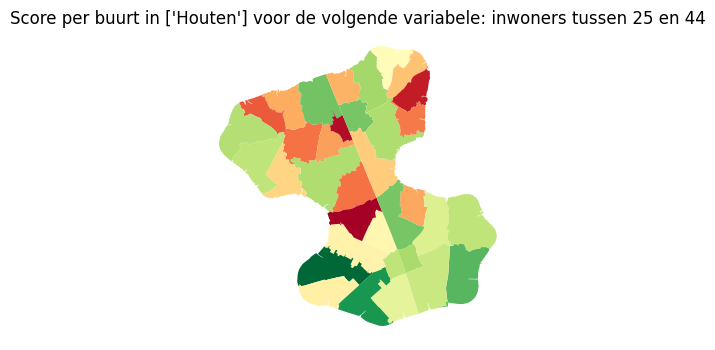

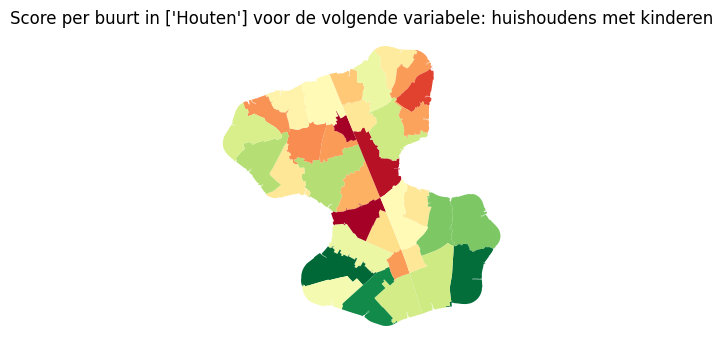

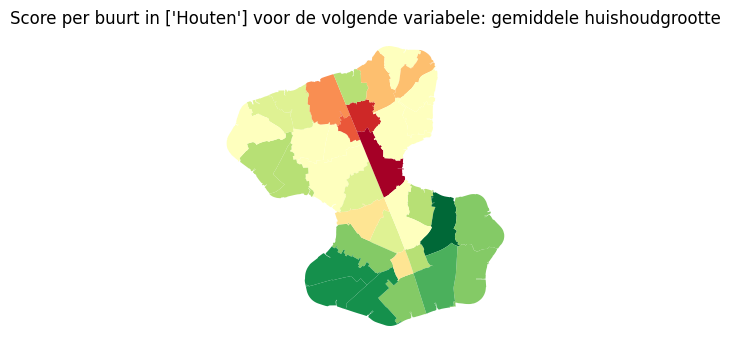

In [26]:
# populatie
populatie_variabelen = {
    'aantal inwoners': 'a_inw',
    'inwoners tussen 25 en 44':'a_25_44',
    'huishoudens met kinderen': 'a_hh_m_k',
    'gemiddele huishoudgrootte': 'g_hhgro', 
    }

# plot values
for key, value in populatie_variabelen.items():
    create_plot_var(buurten, gem_map, key, value)

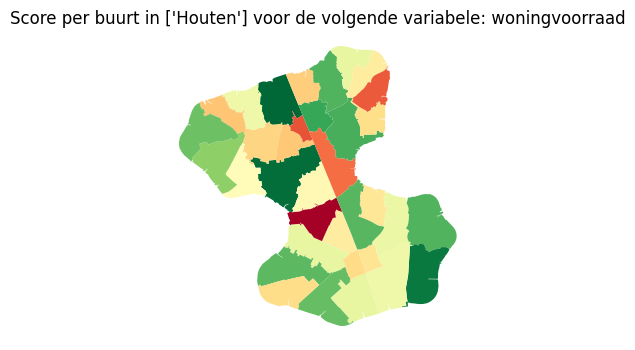

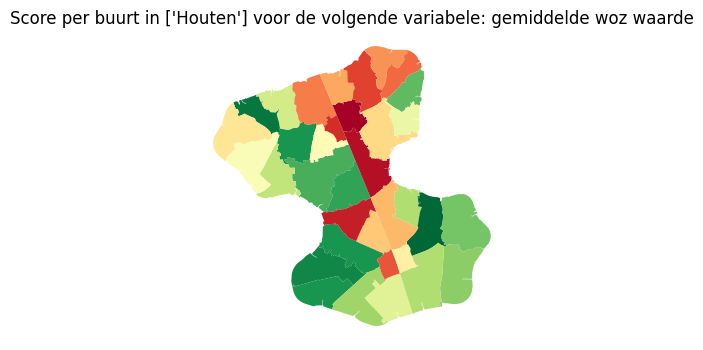

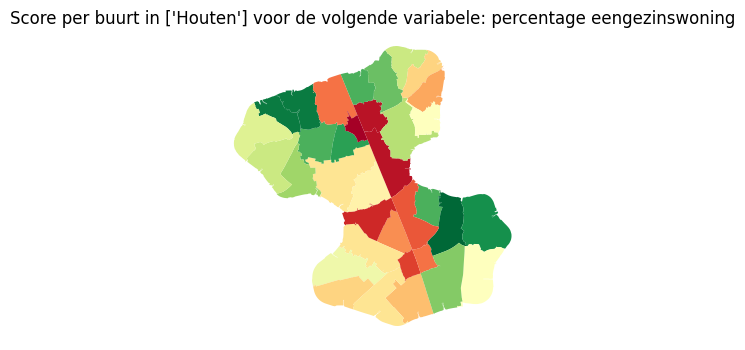

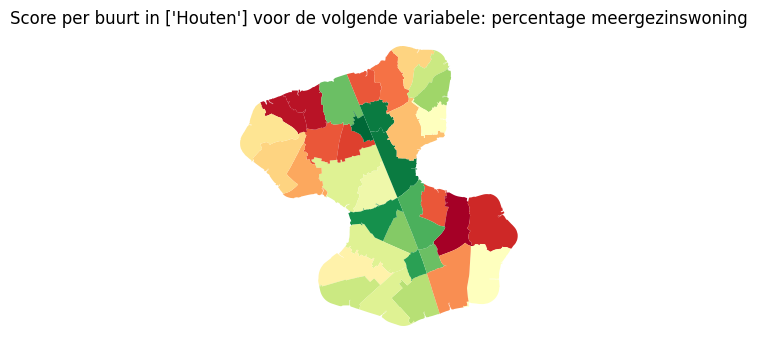

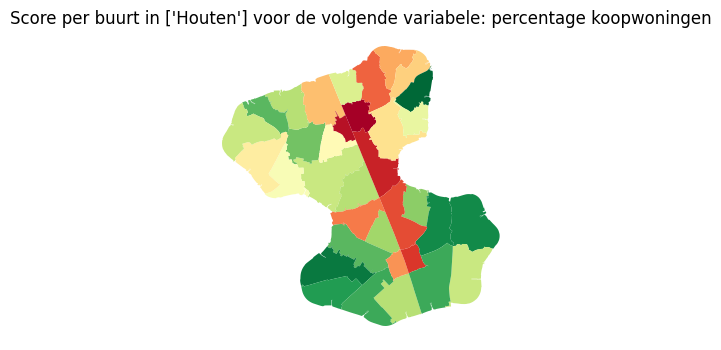

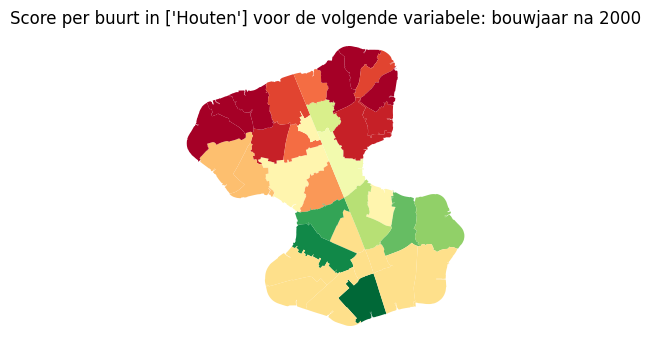

In [27]:
# wonen
wonen_variabelen = {
    'woningvoorraad': 'a_woning',
    'gemiddelde woz waarde':'g_woz',
    'percentage eengezinswoning': 'p_1gezw',
    'percentage meergezinswoning': 'p_mgezw',
    'percentage koopwoningen': 'p_koopw', 
    'bouwjaar na 2000': 'p_bjo2k'}

# plot values
for key, value in wonen_variabelen.items():
    create_plot_var(buurten, gem_map, key, value)

In [31]:
# # energieverbruikt
# energie_variabelen = {
#     'Gemiddeld elektriciteitsverbruik totaal': 'g_ele',
#     'Gemiddeld aardgasverbruik totaal':'g_gas',
#     'Percentage woningen met stadsverwarming':'p_stadsv'
#     }

# # plot values
# for key, value in energie_variabelen.items():
#     create_plot_var(buurten, gem_map, key, value)

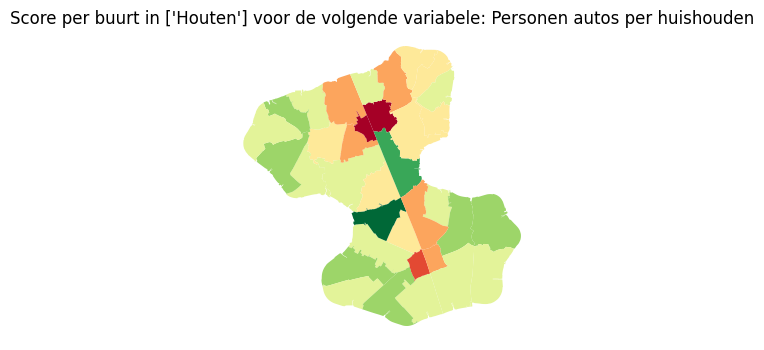

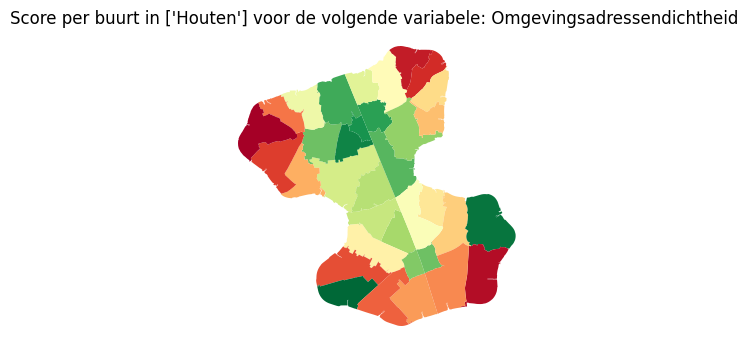

In [34]:
# energieverbruikt
extra_variabelen = {
    'Personen autos per huishouden': 'g_pau_hh',
    # 'Mate van stedelijkheid':'ste_mvs',
    'Omgevingsadressendichtheid ':'ste_oad'
    }

# plot values
for key, value in extra_variabelen.items():
    create_plot_var(buurten, gem_map, key, value)

#### Extra features per buurt 

In [43]:
# Lets see if we can add some extra features per buurt based on other datasets

In [44]:
# Voorzieningen per buurt
nabijheid = pd.read_csv('../data/Nabijheid_voorzieningen__buurt_2019_02012023_192042.csv' , delimiter=';')
nabijheid = nabijheid.loc[nabijheid['Regioaanduiding/Soort regio (omschrijving)'] == 'Buurt     ']

In [45]:
nabijheid.head()

,Wijken en buurten,Regioaanduiding/Gemeentenaam (naam),Regioaanduiding/Soort regio (omschrijving),Regioaanduiding/Codering (code),Regioaanduiding/Indelingswijziging wijken en buurten (code),Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpraktijk (km),Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 1 km (aantal),Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 3 km (aantal),Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 5 km (aantal),Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpost (km),...,Vrije tijd en cultuur/Bioscoop/Aantal bioscopen/Binnen 5 km (aantal),Vrije tijd en cultuur/Bioscoop/Aantal bioscopen/Binnen 10 km (aantal),Vrije tijd en cultuur/Bioscoop/Aantal bioscopen/Binnen 20 km (aantal),Vrije tijd en cultuur/Recreatie/Afstand tot sauna (km),Vrije tijd en cultuur/Recreatie/Afstand tot zonnebank (km),Vrije tijd en cultuur/Recreatie/Afstand tot attractie (km),Vrije tijd en cultuur/Recreatie/Aantal attracties/Binnen 10 km (aantal),Vrije tijd en cultuur/Recreatie/Aantal attracties/Binnen 20 km (aantal),Vrije tijd en cultuur/Recreatie/Aantal attracties/Binnen 50 km (aantal),Afstand tot brandweerkazerne (km)
2,Oude Dorp,Houten,Buurt,BU03211010,1,0.6,1.7,5.0,5.0,8.7,...,1.0,4.2,11.0,1.3,0.4,1.2,2.0,8.0,43.6,1.0
3,Oorden,Houten,Buurt,BU03211011,1,1.1,0.3,5.0,5.0,8.2,...,1.0,6.4,11.0,1.5,0.7,1.5,2.0,8.0,45.0,1.2
4,Hoven,Houten,Buurt,BU03211012,1,0.7,2.2,5.0,5.0,8.5,...,1.0,5.0,11.0,1.6,0.5,1.0,2.0,8.0,44.9,1.3
5,Gaarden,Houten,Buurt,BU03211013,1,1.7,0.0,5.0,5.5,7.5,...,1.0,8.0,11.0,2.0,1.5,2.0,2.0,8.0,45.0,1.7
6,Hoeven,Houten,Buurt,BU03211014,1,1.4,0.0,5.0,5.0,7.8,...,1.0,8.0,11.0,2.3,1.3,1.7,2.0,8.0,45.0,2.0


In [46]:
buurten = buurten.merge(nabijheid, left_on='gwb_code_10', right_on='Regioaanduiding/Codering (code)')

In [49]:
nabijheid_relevante_kolommen ={
    'afstand tot huisarts': 'Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpost (km)',
    'afstand tot apotheek': 'Gezondheid en welzijn/Afstand tot apotheek (km)', 
    # 'afstand tot fysio': 'Gezondheid en welzijn/Fysiotherapeut/Afstand tot fysiotherapeut (km)', 
    'afstand tot supermarkt':  'Detailhandel/Winkels dagelijkse boodschappen/Afstand tot grote supermarkt (km)',
    'afstand tot warenhuis':  'Detailhandel/Warenhuis/Afstand tot warenhuis (km)',
    'afstand tot cafe':  'Horeca/Cafés en dergelijke/Afstand tot café e.d. (km)',
    # 'horeca binnen 5 km':   'Horeca/Restaurants/Aantal restaurants/Binnen 5 km (aantal)',
    # 'opvang binnen 3 km':  'Kinderopvang/Buitenschoolse opvang/Aantal buitenschoolse opvang/Binnen 3 km (aantal)',
    # 'basischolen binnen 3 km':  'Onderwijs/Basisonderwijs/Aantal scholen/Binnen 3 km (aantal)',
    # 'voortgezet onderwijs binnen 5 km':  'Onderwijs/Voortgezet onderwijs/Voortgezet onderwijs totaal/Aantal scholen/Binnen 5 km (aantal)',
    'afstand tot oprit hoofdverkeersweg' : 'Verkeer en vervoer/Afstand tot oprit hoofdverkeersweg (km)',
    'afstand tot trein':  'Verkeer en vervoer/Treinstations/Afstand tot treinstations totaal (km)',
    # 'afstand tot sport':  'Groenvoorzieningen/Semi-openbaar groen/Afstand tot sportterrein (km)',
    'afstand tot bos':  'Groenvoorzieningen/Openbaar groen/Afstand tot bos (km)'
    }

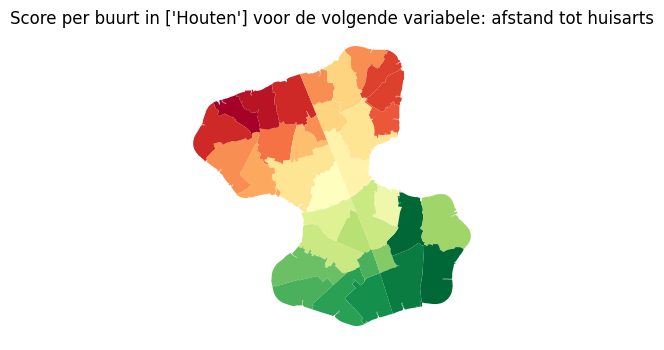

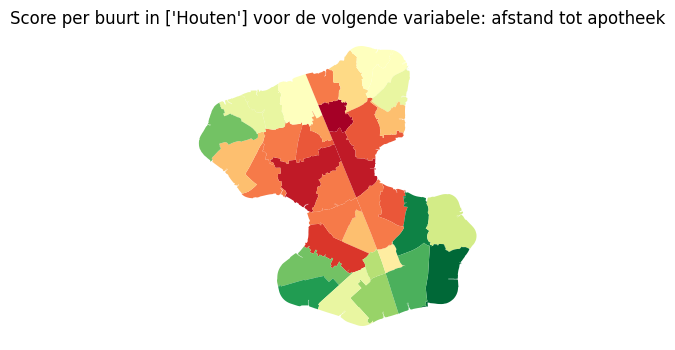

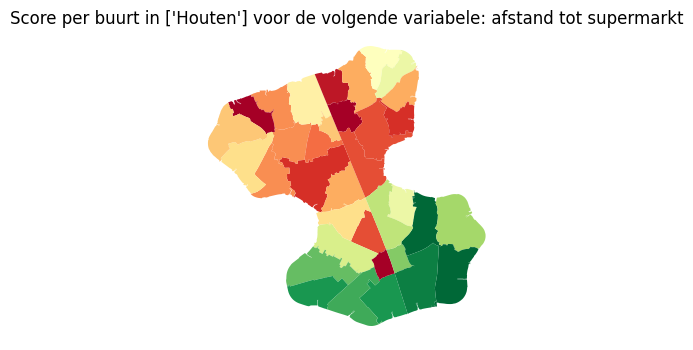

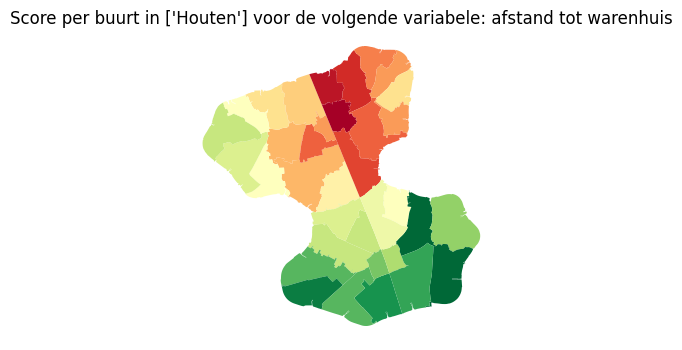

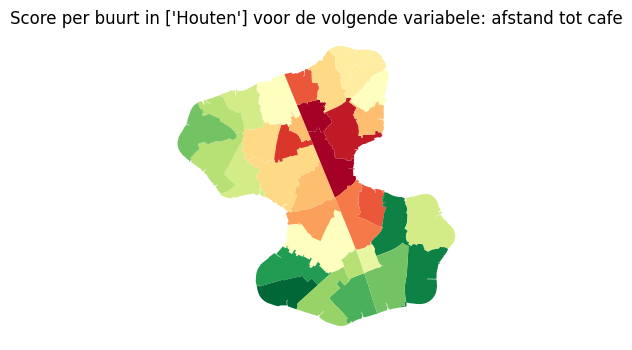

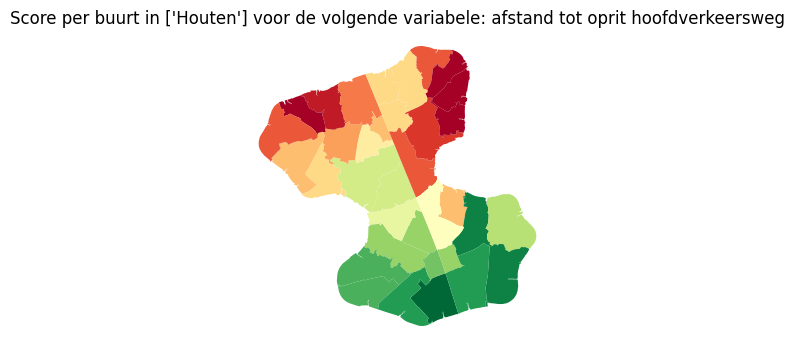

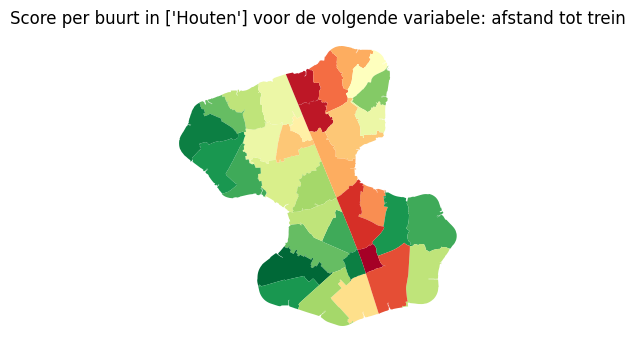

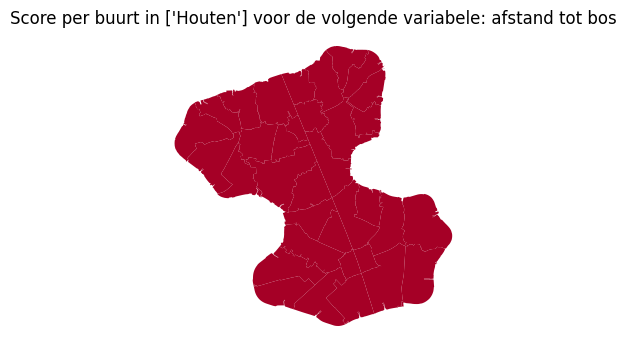

In [50]:
# plot values
for key, value in nabijheid_relevante_kolommen.items():
    create_plot_var(buurten, gem_map, key, value)

In [51]:
gebruikte_variabelen = {
    'buurt_code': 'gwb_code_10',
    'regio':'regio',
    'aantal inwoners': 'a_inw',
    'inwoners tussen 25 en 44':'a_25_44',
    'westerse inwoners': 'a_w_all',
    'huishoudens met kinderen': 'a_hh_m_k',
    'gemiddele huishoudgrootte': 'g_hhgro', 
    'woningvoorraad': 'a_woning',
    'gemiddelde woz waarde':'g_woz',
    'percentage eengezinswoning': 'p_1gezw',
    'percentage meergezinswoning': 'p_mgezw',
    'percentage koopwoningen': 'p_koopw', 
    'bouwjaar na 2000': 'p_bjo2k',
    'Personen autos per huishouden': 'g_pau_hh',
    'Omgevingsadressendichtheid ':'ste_oad',
    'afstand tot huisarts': 'Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpost (km)',
    'afstand tot apotheek': 'Gezondheid en welzijn/Afstand tot apotheek (km)', 
    'afstand tot supermarkt':  'Detailhandel/Winkels dagelijkse boodschappen/Afstand tot grote supermarkt (km)',
    'afstand tot warenhuis':  'Detailhandel/Warenhuis/Afstand tot warenhuis (km)',
    'afstand tot cafe':  'Horeca/Cafés en dergelijke/Afstand tot café e.d. (km)',
    'afstand tot oprit hoofdverkeersweg' : 'Verkeer en vervoer/Afstand tot oprit hoofdverkeersweg (km)',
    'afstand tot trein':  'Verkeer en vervoer/Treinstations/Afstand tot treinstations totaal (km)',
    }    


In [55]:
lijst_gebruik = []
[lijst_gebruik.append(values) for key, values in gebruikte_variabelen.items()] 
print('extracting relevant features..')

extracting relevant features..


In [57]:
# Get dataset with relevant variables
analyse_dataset = buurten[lijst_gebruik]

In [ ]:
analyse_dataset.head()